In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy.stats.stats import pearsonr
%matplotlib inline

print('Imported all dependencies!')

Imported all dependencies!


In [3]:
# Saving and displaying the dataset:

movies = pd.read_csv('fandango_score_comparison.csv')
movies.head(10)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.30,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.00,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.50,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.40,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5
5,The Water Diviner (2015),63,62,50,6.8,7.2,4.5,4.0,3.15,3.10,...,3.60,3.0,3.0,2.5,3.5,3.5,34,39373,397,0.5
6,Irrational Man (2015),42,53,53,7.6,6.9,4.0,3.5,2.10,2.65,...,3.45,2.0,2.5,2.5,4.0,3.5,17,2680,252,0.5
7,Top Five (2014),86,64,81,6.8,6.5,4.0,3.5,4.30,3.20,...,3.25,4.5,3.0,4.0,3.5,3.5,124,16876,3223,0.5
8,Shaun the Sheep Movie (2015),99,82,81,8.8,7.4,4.5,4.0,4.95,4.10,...,3.70,5.0,4.0,4.0,4.5,3.5,62,12227,896,0.5
9,Love & Mercy (2015),89,87,80,8.5,7.8,4.5,4.0,4.45,4.35,...,3.90,4.5,4.5,4.0,4.5,4.0,54,5367,864,0.5


# Visualizing the dataset:

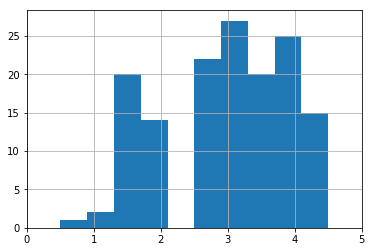

In [16]:
# Metacritic hist:

plt.hist(movies['Metacritic_norm_round'])
plt.xlim(0, 5.0)
plt.grid(True)
plt.show()

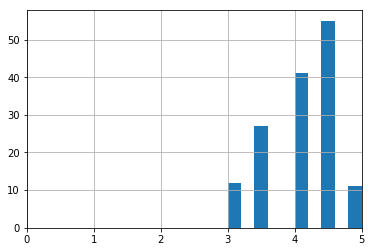

In [15]:
# Fandango hist:
plt.hist(movies['Fandango_Stars'])
plt.xlim(0, 5.0)
plt.grid(True)
plt.show()

Fandango does not have any reviews below 3 stars whereas Metacritic has a bigger range even though they are skew higher (above 3 stars).

# Analyzing differences in result from dataset:

In [18]:
# Calculating the mean of both datasets:

metacritic_mean = movies['Metacritic_norm_round'].mean()
fandango_mean = movies['Fandango_Stars'].mean()

print('Metacritic mean:', metacritic_mean)
print('Fandango mean:', fandango_mean)

Metacritic mean: 2.9726027397260273
Fandango mean: 4.089041095890411


In [19]:
# Calculating the median of both datasets:

metacritic_median = np.median(movies['Metacritic_norm_round'])
fandango_median = np.median(movies['Fandango_Stars'])

print('Metacritic median:', metacritic_median)
print('Fandango median:', fandango_median)

Metacritic median: 3.0
Fandango median: 4.0


In [20]:
# Calculating the standard deviation of both datasets:

metacritic_stddev = movies['Metacritic_norm_round'].std()
fandango_stddev = movies['Fandango_Stars'].std()

print('Metacritic standard deviation:', metacritic_stddev)
print('Fandango standard deviation:', fandango_stddev)

Metacritic standard deviation: 0.9909605613743364
Fandango standard deviation: 0.5403859779787333


Metacritic's mean is lower than the median since there are a couple of reviews that are below the average, which drags down the overall number. The same situation happens with Fandango, but on the opposite side. Most movies reviewed by Fandango are highly rated, pushing the overall mean upwards.

# Visualizing the differences:

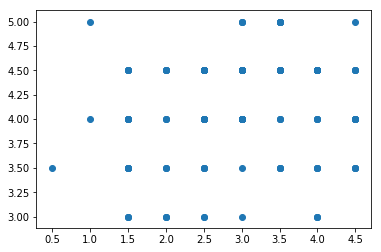

In [23]:
plt.scatter(movies['Metacritic_norm_round'], movies['Fandango_Stars'])
plt.show()

In [32]:
# Calculating differences between dataset:

movies['fm_diff'] = np.abs(movies['Fandango_Stars'] - movies['Metacritic_norm_round'])
movies.sort_values(by='fm_diff', ascending=False).head(10)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference,fm_diff
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5,4.0
85,Little Boy (2015),20,81,30,5.9,7.4,4.5,4.3,1.00,4.05,...,1.0,4.0,1.5,3.0,3.5,38,5927,811,0.2,3.0
47,Annie (2014),27,61,33,4.8,5.2,4.5,4.2,1.35,3.05,...,1.5,3.0,1.5,2.5,2.5,108,19222,6835,0.3,3.0
19,Pixels (2015),17,54,27,5.3,5.6,4.5,4.1,0.85,2.70,...,1.0,2.5,1.5,2.5,3.0,246,19521,3886,0.4,3.0
134,The Longest Ride (2015),31,73,33,4.8,7.2,4.5,4.5,1.55,3.65,...,1.5,3.5,1.5,2.5,3.5,49,25214,2603,0.0,3.0
133,Paul Blart: Mall Cop 2 (2015),5,36,13,2.4,4.3,3.5,3.5,0.25,1.80,...,0.5,2.0,0.5,1.0,2.0,211,15004,3054,0.0,3.0
35,The Loft (2015),11,40,24,2.4,6.3,4.0,3.6,0.55,2.00,...,0.5,2.0,1.0,1.0,3.0,80,21319,811,0.4,3.0
15,Taken 3 (2015),9,46,26,4.6,6.1,4.5,4.1,0.45,2.30,...,0.5,2.5,1.5,2.5,3.0,240,104235,6757,0.4,3.0
125,The Wedding Ringer (2015),27,66,35,3.3,6.7,4.5,4.4,1.35,3.30,...,1.5,3.5,2.0,1.5,3.5,126,37292,6506,0.1,2.5
51,Entourage (2015),32,68,38,5.2,7.1,4.5,4.2,1.60,3.40,...,1.5,3.5,2.0,2.5,3.5,96,21914,4279,0.3,2.5


In [36]:
# Calculating the r-value of dataset:

r, p_value = pearsonr(movies['Fandango_Stars'], movies['Metacritic_norm_round'])
print('R-value:', r)

R-value: 0.178449190739


The correlation between Metacritic and Fandango is very low, which entails that Fandango has a tendency of reviewing movies completely different and give them different ratings than Metacritic.

In [43]:
# Calculating the linear regression:

slope, intercept, r_value, p_value, stdderr = linregress(movies['Metacritic_norm_round'], movies['Fandango_Stars'])
print('Slope:', slope)
print('Intercept:', intercept)
print('R-Value:', r_value)
print('P-Value:', p_value)
print('Standard Deviation:', stdderr)

Slope: 0.0973110779739
Intercept: 3.7997739189
R-Value: 0.178449190739
P-Value: 0.0311615162285
Standard Deviation: 0.0447135446568


In [44]:
# Predicting Fandango scores based on Metacritic scores:

pred_3 = 3 * slope + intercept
pred_3

4.0917071528212032

In [45]:
pred_1 = 1 * slope + intercept
pred_1

3.8970849968733465

In [46]:
pred_5 = 5 * slope + intercept
pred_5

4.2863293087690604

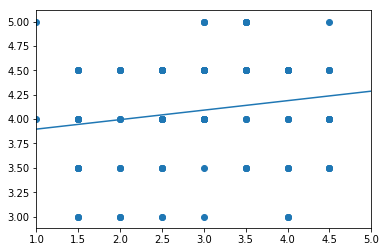

In [50]:
plt.scatter(movies['Metacritic_norm_round'], movies['Fandango_Stars'])
plt.plot([1.0, 5.0], [pred_1, pred_5])
plt.xlim(1, 5)
plt.show()